In [1]:


# Remember: comments in python are denoted by the pou_oldd sign
import numpy                       #here we load numpy
from matplotlib import pyplot      #here we load matplotlib
import time, sys                   #and load some utilities

import math

In [6]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

%matplotlib inline

###variable declarations
nx = 31
ny = 31
nt = 50
nu = .05
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .25
dt = sigma * dx * dy / nu

u0 = numpy.empty((ny, nx))

x = numpy.empty(nx)
y = numpy.empty(ny)

for i in range(nx):
    x[i] = i * dx

for j in range(ny):
    y[j] = j * dy

for i in range(ny):
    for j in range(nx):
        u0[i, j] = 1.

# Initial condition
for i in range(int(.5 / dy),int(1 / dy + 1)):
    for j in range(int(.5 / dx),int(1 / dx + 1)):
        u0[i, j] = 2.

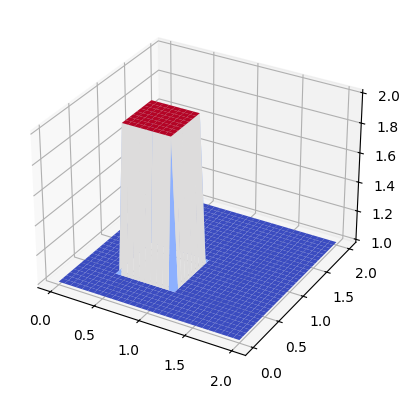

In [7]:
###Plot Initial Condition
##the figsize parameter can be used to produce different sized images
fig, ax = pyplot.subplots(subplot_kw={"projection": "3d"})

X, Y = numpy.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u0, cmap=cm.coolwarm)

In [8]:
u = u0 #initialize a temporary array

for n in range(nt):  #loop for values of n from 0 to nt, so it will ru_old nt times
    u0 = u.copy() ##copy the existing values of u into u_old
    for i in range(1, ny - 1): ## you can try commenting this line and...
        for j in range(1, nx - 1):
            u[i, j] = u0[i, j] * (1. - 2 * nu * dt/(dx**2) - 2 * nu * dt/(dy**2)) + (nu * dt/(dx**2)) * (u0[i+1, j] + u0[i-1, j]) + (nu * dt/(dy**2)) * (u0[i, j-1] + u0[i, j+1])
    u[-1, :] = u[0, :] = u[:, -1] = u[:, 0] = 1

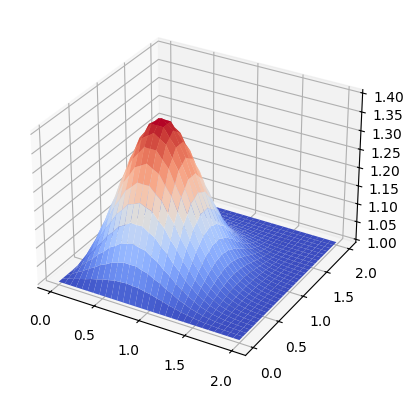

In [9]:
fig, ax = pyplot.subplots(subplot_kw={"projection": "3d"})

X, Y = numpy.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u, cmap=cm.coolwarm)